# Library

In [1]:
import os
import random
import platform

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
!pip freeze > requirements.txt

In [3]:
print('Python version:', platform.python_version())
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.7.6
Numpy version: 1.18.5
Pandas version: 1.0.3
Matplotlib version: 3.2.1
Seaborn version: 0.10.0
Scikit-Learn version: 0.23.1


In [4]:
SEED = 42

os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Dataset

In [5]:
!ls /kaggle/input
!ls /kaggle/input/student-shopee-code-league-marketing-analytics

student-shopee-code-league-marketing-analytics
sample_submission_0_1.csv  test.csv  train.csv	users.csv


In [6]:
df_train = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/train.csv')
df_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [7]:
df_test = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/test.csv')
df_test

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [8]:
df_users = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/users.csv')
df_users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


# EDA

## Describe

In [9]:
df_train.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000
mean,2.533159,63048.595358,43.656373,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,36769.00000
std,1.675251,36068.006037,11.219323,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,21229.02506
min,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,31679.500000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,18384.50000
50%,2.000000,63340.000000,43.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,36769.00000
75%,3.000000,94731.500000,52.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,55153.50000
max,7.000000,127925.000000,75.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,73538.00000


In [10]:
df_test.describe()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000
mean,2.835215,65049.007790,42.212703,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000
std,1.728489,37934.945847,12.276136,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162
min,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,32293.250000,35.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000
50%,3.000000,64683.000000,41.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,27984.50000
75%,4.000000,97776.500000,48.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,41976.75000
max,7.000000,127922.000000,79.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,55969.00000


In [11]:
df_users.describe()

,user_id,attr_1,attr_2,attr_3,age
count,127886.000000,78987.000000,127439.000000,127886.000000,78987.000000
mean,63961.168760,0.999823,0.998007,1.079782,31.370124
std,36928.842572,0.013312,0.044600,1.035413,11.591752
min,0.000000,0.000000,0.000000,0.000000,-17.000000
25%,31981.250000,1.000000,1.000000,0.000000,24.000000
50%,63958.500000,1.000000,1.000000,1.000000,29.000000
75%,95941.750000,1.000000,1.000000,2.000000,36.000000
max,127925.000000,1.000000,1.000000,4.000000,118.000000


## N-unique

In [12]:
# feature
print('country_code: ', df_train['country_code'].nunique())
print('subject_line_length: ', df_train['subject_line_length'].nunique())
print('open_count_last_10_days: ',
      df_train['open_count_last_10_days'].nunique())
print('open_count_last_30_days: ',
      df_train['open_count_last_30_days'].nunique())
print('open_count_last_60_days: ',
      df_train['open_count_last_60_days'].nunique())
print('login_count_last_10_days: ',
      df_train['login_count_last_10_days'].nunique())
print('login_count_last_30_days: ',
      df_train['login_count_last_30_days'].nunique())
print('login_count_last_60_days: ',
      df_train['login_count_last_60_days'].nunique())
print('checkout_count_last_10_days: ',
      df_train['checkout_count_last_10_days'].nunique())
print('checkout_count_last_30_days: ',
      df_train['checkout_count_last_30_days'].nunique())
print('checkout_count_last_60_days: ',
      df_train['checkout_count_last_60_days'].nunique())

# non feature
print('grass_date: ', df_train['grass_date'].nunique())
print('user_id: ', df_train['user_id'].nunique())
print('open_flag: ', df_train['open_flag'].nunique())

country_code:  7
subject_line_length:  56
open_count_last_10_days:  20
open_count_last_30_days:  46
open_count_last_60_days:  76
login_count_last_10_days:  168
login_count_last_30_days:  376
login_count_last_60_days:  637
checkout_count_last_10_days:  71
checkout_count_last_30_days:  142
checkout_count_last_60_days:  219
grass_date:  47
user_id:  72845
open_flag:  2


In [13]:
print('attr_1:', df_users['attr_1'].nunique())
print('attr_2:', df_users['attr_2'].nunique())
print('attr_3:', df_users['attr_3'].nunique())
print('age:', df_users['age'].nunique())
print('domain:', df_users['domain'].nunique())

print('user_id:', df_users['user_id'].nunique())

attr_1: 2
attr_2: 2
attr_3: 5
age: 106
domain: 11
user_id: 127886


# Unique

In [14]:
print('train country_code: ', df_train['country_code'].unique())
print('test country_code: ', df_test['country_code'].unique())
print('subject_line_length: ', df_train['subject_line_length'].unique())

train country_code:  [4 6 1 5 2 3 7]
test country_code:  [6 5 1 3 2 7 4]
subject_line_length:  [44 49 43 32 36 64 40 48 46 58 33 31 35 25 38 45 30 42 37 60 52 39 41 27
 50 61 29 53 51 34 55 59 47 56 57 66 69 62 18 54 28 72 22 63 26 20 68 24
 67 21 23 65 10 75 13 71]


In [15]:
print('attr_1:', df_users['attr_1'].unique())
print('attr_2:', df_users['attr_2'].unique())
print('attr_3:', df_users['attr_3'].unique())
print('age:', df_users['age'].unique())
print('domain:', df_users['domain'].unique())

attr_1: [nan  1.  0.]
attr_2: [ 1. nan  0.]
attr_3: [0. 2. 1. 4. 3.]
age: [ nan  50.  33.  30.  32.  36.  43.  25.  38.  45.  28.  44.  39.  22.
  24.  40.  37.  29.  23.  21.  34.  27.  47.  26.  20.  42.  35.  31.
  69.  41.  59.  48.  52.  54.  46.  19.  18.   0.  51.  55.   5.   6.
  16.   4.  66.  58.   1.  49.  60.  53.  17. -16. 100.   7.  56.  71.
 118.  70. 115.   2. 114.  68.   9.  61.  57.  11.  13.  10.   3.  63.
  74.  14.  91.  62.  75.  67.  93.   8. 110.  15. 107.  64.  65.  73.
 108.  87. 109. 101. 106.  72.  76. 117.  95.  80.  98.  12. 116.  81.
 112.  92.  77. 103. 105. -17.  99.  97. 104.]
domain: ['@gmail.com' 'other' '@yahoo.com' '@hotmail.com' '@ymail.com' '@live.com'
 '@icloud.com' '@outlook.com' '@rocketmail.com' '@qq.com' '@163.com']


In [16]:
print('train grass_date:', df_train['grass_date'].unique())
print('test grass_date:', df_test['grass_date'].unique())

train grass_date: ['2019-07-16 00:00:00+08:00' '2019-07-17 00:00:00+08:00'
 '2019-07-18 00:00:00+08:00' '2019-07-19 00:00:00+08:00'
 '2019-07-20 00:00:00+08:00' '2019-07-21 00:00:00+08:00'
 '2019-07-22 00:00:00+08:00' '2019-07-23 00:00:00+08:00'
 '2019-07-24 00:00:00+08:00' '2019-07-25 00:00:00+08:00'
 '2019-07-26 00:00:00+08:00' '2019-07-27 00:00:00+08:00'
 '2019-07-28 00:00:00+08:00' '2019-07-29 00:00:00+08:00'
 '2019-07-30 00:00:00+08:00' '2019-08-01 00:00:00+08:00'
 '2019-08-02 00:00:00+08:00' '2019-08-03 00:00:00+08:00'
 '2019-08-04 00:00:00+08:00' '2019-08-05 00:00:00+08:00'
 '2019-08-06 00:00:00+08:00' '2019-08-07 00:00:00+08:00'
 '2019-08-08 00:00:00+08:00' '2019-08-09 00:00:00+08:00'
 '2019-08-10 00:00:00+08:00' '2019-08-11 00:00:00+08:00'
 '2019-08-12 00:00:00+08:00' '2019-08-13 00:00:00+08:00'
 '2019-08-14 00:00:00+08:00' '2019-08-15 00:00:00+08:00'
 '2019-08-16 00:00:00+08:00' '2019-08-17 00:00:00+08:00'
 '2019-08-18 00:00:00+08:00' '2019-08-19 00:00:00+08:00'
 '2019-08-20 

## Correlation

In [17]:
df_train.corr()

,country_code,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
country_code,1.000000,-0.047390,-0.228446,0.072410,0.069744,0.058096,-0.088779,-0.095858,-0.095539,-0.014670,-0.022188,-0.026485,0.158945,-0.019166
user_id,-0.047390,1.000000,0.090311,-0.002713,-0.006046,-0.019741,-0.215780,-0.235338,-0.265182,-0.124446,-0.139839,-0.161749,-0.008082,0.038622
subject_line_length,-0.228446,0.090311,1.000000,-0.027971,-0.045970,-0.049144,-0.005046,-0.007230,-0.010097,0.010012,0.012583,0.011023,-0.057357,-0.156833
open_count_last_10_days,0.072410,-0.002713,-0.027971,1.000000,0.877419,0.794886,0.040657,0.038676,0.036750,0.029375,0.027027,0.025011,0.515307,-0.044468
open_count_last_30_days,0.069744,-0.006046,-0.045970,0.877419,1.000000,0.938160,0.032019,0.037448,0.039500,0.022026,0.025572,0.026829,0.507853,-0.016733
open_count_last_60_days,0.058096,-0.019741,-0.049144,0.794886,0.938160,1.000000,0.029649,0.034864,0.044092,0.021949,0.023505,0.029054,0.477766,0.017703
login_count_last_10_days,-0.088779,-0.215780,-0.005046,0.040657,0.032019,0.029649,1.000000,0.938163,0.889673,0.406717,0.400422,0.389681,0.014023,0.030594
login_count_last_30_days,-0.095858,-0.235338,-0.007230,0.038676,0.037448,0.034864,0.938163,1.000000,0.964382,0.363217,0.423100,0.421970,0.010134,0.027578
login_count_last_60_days,-0.095539,-0.265182,-0.010097,0.036750,0.039500,0.044092,0.889673,0.964382,1.000000,0.344062,0.402575,0.438505,0.008633,0.034341
checkout_count_last_10_days,-0.014670,-0.124446,0.010012,0.029375,0.022026,0.021949,0.406717,0.363217,0.344062,1.000000,0.860379,0.775574,0.015573,0.012013


## dtype

# Create feature

In [18]:
# 0. Copy df
X_train = df_train.copy()
X_test = df_test.copy()

In [19]:
# 1. Categorical : country_code
cc_cat = pd.get_dummies(X_train['country_code'])
cc_cat.columns = [f'country_code_{c}' for c in cc_cat.columns]
del X_train['country_code']
X_train = pd.concat([X_train, cc_cat], axis=1)

cc_cat = pd.get_dummies(X_test['country_code'])
cc_cat.columns = [f'country_code_{c}' for c in cc_cat.columns]
del X_test['country_code']
X_test = pd.concat([X_test, cc_cat], axis=1)

In [20]:
# 2. Categorical/date : grass_date

del X_train['grass_date']
del X_test['grass_date']

In [21]:
# 3. Categorical : domain
cc_cat = pd.get_dummies(df_users['domain'])
cc_cat.columns = [f'domain_{c}' for c in cc_cat.columns]
del df_users['domain']
df_users = pd.concat([df_users, cc_cat], axis=1)

In [22]:
# 4. Continious : attr, age
def handle_nan(column_name):
    sr_nan = df_users[column_name].apply(np.isnan)
    sr_nan.name = f'{column_name}_nan'
    sr = df_users[column_name].fillna(-1)
    sr.name = column_name
    return [sr_nan, sr]

sr_attr_1_nan, sr_attr_1 = handle_nan('attr_1')
sr_attr_2_nan, sr_attr_2 = handle_nan('attr_2')
sr_attr_3_nan, sr_attr_3 = handle_nan('attr_3')
sr_age_nan, sr_age = handle_nan('age')

In [23]:
df_users['attr_1'] = sr_attr_1
df_users['attr_2'] = sr_attr_2
df_users['attr_3'] = sr_attr_3
df_users['age'] = sr_age

df_users = pd.concat(
    [df_users, sr_attr_1_nan, sr_attr_2_nan, sr_attr_3_nan, sr_age_nan], axis=1)
df_users

,user_id,attr_1,attr_2,attr_3,age,domain_@163.com,domain_@gmail.com,domain_@hotmail.com,domain_@icloud.com,domain_@live.com,domain_@outlook.com,domain_@qq.com,domain_@rocketmail.com,domain_@yahoo.com,domain_@ymail.com,domain_other,attr_1_nan,attr_2_nan,attr_3_nan,age_nan
0,0,-1.0,1.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,True,False,False,True
1,1,1.0,1.0,2.0,50.0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False
2,2,-1.0,1.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,0,1,True,False,False,True
3,3,-1.0,1.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,True,False,False,True
4,4,1.0,1.0,2.0,33.0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127881,127921,-1.0,1.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,0,0,True,False,False,True
127882,127922,1.0,1.0,0.0,20.0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False
127883,127923,-1.0,1.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,True,False,False,True
127884,127924,-1.0,0.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,True,False,False,True


In [24]:
# 5. Merge df_users with X_train/X_test
df_users_columns = list(df_users.columns)
df_users_columns.remove('user_id')

X_train_users = pd.DataFrame(columns=df_users_columns)
X_test_users = pd.DataFrame(columns=df_users_columns)

In [25]:
def get_val(user_id, column):
    user = df_users[df_users['user_id'] == user_id][column]
    return user.iloc[0]

In [26]:
# very slow, need optimization
for c in df_users_columns:
    X_train[c] = X_train['user_id'].apply(lambda uid: get_val(uid, c))
    X_test[c] = X_test['user_id'].apply(lambda uid: get_val(uid, c))
    print(f'Done processing feature {c}')

Done processing feature attr_1
Done processing feature attr_2
Done processing feature attr_3
Done processing feature age
Done processing feature domain_@163.com
Done processing feature domain_@gmail.com
Done processing feature domain_@hotmail.com
Done processing feature domain_@icloud.com
Done processing feature domain_@live.com
Done processing feature domain_@outlook.com
Done processing feature domain_@qq.com
Done processing feature domain_@rocketmail.com
Done processing feature domain_@yahoo.com
Done processing feature domain_@ymail.com
Done processing feature domain_other
Done processing feature attr_1_nan
Done processing feature attr_2_nan
Done processing feature attr_3_nan
Done processing feature age_nan


In [27]:
# 6. Del unused column
del X_train['open_flag']
del X_train['row_id']
del X_train['user_id']

del X_test['row_id']
del X_test['user_id']

In [28]:
# 7. Create y
y_train = df_train['open_flag'].to_numpy()
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [29]:
# 8. categorical : last_{}_day

# del X_train['last_open_day']
# del X_train['last_login_day']
# del X_train['last_checkout_day']

# del X_test['last_open_day']
# del X_test['last_login_day']
# del X_test['last_checkout_day']

def str2int(string):
    try:
        val = np.int32(string)
        return val
    except:
        return np.nan

def handle_nan(df, column_name):
    df[column_name] = df[column_name].apply(str2int)
    sr_nan = df[column_name].apply(np.isnan)
    sr_nan.name = f'{column_name}_nan'
    sr = df[column_name].fillna(-1)
    sr.name = column_name
    return [sr_nan, sr]

sr_train_last_open_day_nan, sr_train_last_open_day = handle_nan(X_train, 'last_open_day')
sr_train_last_login_day_nan, sr_train_last_login_day = handle_nan(X_train, 'last_login_day')
sr_train_last_checkout_day_nan, sr_train_last_checkout_day = handle_nan(X_train, 'last_checkout_day')

sr_test_last_open_day_nan, sr_test_last_open_day = handle_nan(X_test, 'last_open_day')
sr_test_last_login_day_nan, sr_test_last_login_day = handle_nan(X_test, 'last_login_day')
sr_test_last_checkout_day_nan, sr_test_last_checkout_day = handle_nan(X_test, 'last_checkout_day')

In [30]:
X_train['last_open_day'] = sr_train_last_open_day
X_train['last_login_day'] = sr_train_last_login_day
X_train['last_checkout_day'] = sr_train_last_checkout_day

X_train = pd.concat([X_train, sr_train_last_open_day, sr_train_last_login_day, sr_train_last_checkout_day], axis=1)

X_test['last_open_day'] = sr_test_last_open_day
X_test['last_login_day'] = sr_test_last_login_day
X_test['last_checkout_day'] = sr_test_last_checkout_day

X_test = pd.concat([X_test, sr_test_last_open_day, sr_test_last_login_day, sr_test_last_checkout_day], axis=1)

In [31]:
# 9. Prepare class weight
label, label_count = np.unique(y_train, return_counts=True)

lowest_label_count = np.min(label_count)

list_weight = [lowest_label_count/c for c in label_count]

dict_weight = {
    label[0]: list_weight[0],
    label[1]: list_weight[1],
}
list_weight_each = [list_weight[0] if y == 0 else list_weight[1] for y in y_train]
print(dict_weight)
print(list_weight)
print(list_weight_each[:10])

{0: 0.18452716524652482, 1: 1.0}
[0.18452716524652482, 1.0]
[0.18452716524652482, 1.0, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 1.0, 0.18452716524652482]


In [32]:
# 10. save
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

df_y_train = pd.DataFrame({'y': y_train})
df_y_train.to_csv('y_train.csv', index=False)


In [33]:
X_train.sample(5)

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,attr_1_nan,attr_2_nan,attr_3_nan,age_nan,last_open_day,last_login_day,last_checkout_day
11995,39,-1.0,11.0,24.0,0,0,0,0,6,6,...,0,0,0,True,False,False,True,-1.0,11.0,24.0
69852,33,97.0,2.0,2.0,0,0,0,11,19,70,...,0,0,0,False,False,False,False,97.0,2.0,2.0
7149,43,58.0,2.0,10.0,0,0,1,25,76,149,...,1,0,0,False,False,False,False,58.0,2.0,10.0
4449,52,3.0,12.0,78.0,4,17,30,0,8,10,...,0,0,0,False,False,False,False,3.0,12.0,78.0
36644,52,-1.0,21.0,-1.0,3,3,3,0,1,1,...,0,0,0,True,False,False,True,-1.0,21.0,-1.0


In [34]:
X_test.sample(5)

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,attr_1_nan,attr_2_nan,attr_3_nan,age_nan,last_open_day,last_login_day,last_checkout_day
27299,31,5.0,23.0,-1.0,0,6,11,0,0,0,...,0,0,0,True,False,False,True,5.0,23.0,-1.0
13688,37,-1.0,1.0,1.0,0,0,0,18,34,52,...,0,0,0,True,False,False,True,-1.0,1.0,1.0
26119,71,70.0,6.0,-1.0,0,0,0,7,10,25,...,0,0,1,True,False,False,True,70.0,6.0,-1.0
48409,51,84.0,2.0,30.0,0,0,0,4,23,37,...,0,0,0,False,False,False,False,84.0,2.0,30.0
2889,28,2.0,1.0,-1.0,0,0,1,2,2,3,...,0,0,0,True,False,False,True,2.0,1.0,-1.0


# Model function

In [35]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

def predict(model, X):
    y = model.predict(X)
    return y

def metrics(y_true, y_pred):
    print('F1 Score :', f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, [0,1], [0,1])

    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
    plt.show()

# Bernoulli NB

In [36]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train, list_weight_each)

BernoulliNB()

F1 Score : 0.6155730776862008
              precision    recall  f1-score   support

           0       0.96      0.65      0.78     62083
           1       0.31      0.84      0.45     11456

    accuracy                           0.68     73539
   macro avg       0.63      0.75      0.62     73539
weighted avg       0.86      0.68      0.73     73539



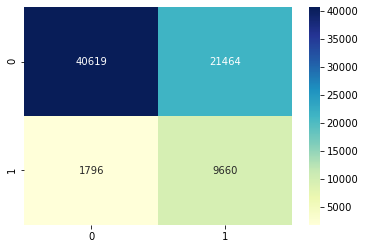

In [37]:
y_train_pred = predict(clf, X_train)
metrics(y_train, y_train_pred)

In [38]:
y_test_pred = predict(clf, X_test)

df_submission = pd.concat(
    [pd.Series(range(0, len(X_test)), name='row_id'), pd.Series(y_test_pred, name='open_flag')], axis=1)
df_submission.to_csv('submission_BernoulliNB.csv', index=False)

df_submission

,row_id,open_flag
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,1


# SVC

In [39]:
# from sklearn.svm import SVC

# clf = SVC(kernel='rbf', C=1, cache_size=10240)
# clf.fit(X_train, y_train, class_weight='balanced')

In [40]:
# y_train_pred = predict(clf, X_train)
# metrics(y_train, y_train_pred)

In [41]:
# y_test_pred = predict(clf, X_test)

# df_submission = pd.concat(
#     [pd.Series(range(0, len(X_test)), name='row_id'), pd.Series(y_test_pred, name='open_flag')], axis=1)
# df_submission.to_csv('submission_SVC.csv', index=False)

# df_submission